# <center>Employee attrition (2512)<center>


### Imports

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### Data Loading

In [2]:
df = pd.read_csv("Emp.csv")

### Null checking

In [20]:
# df.shape
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Clearly, we dont have any null values to be processsed in the dataset

#### Data Visualizations

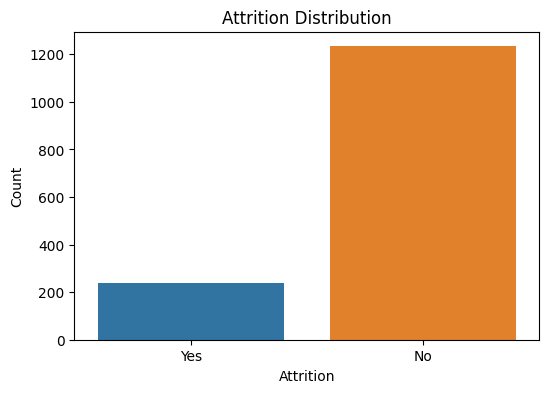

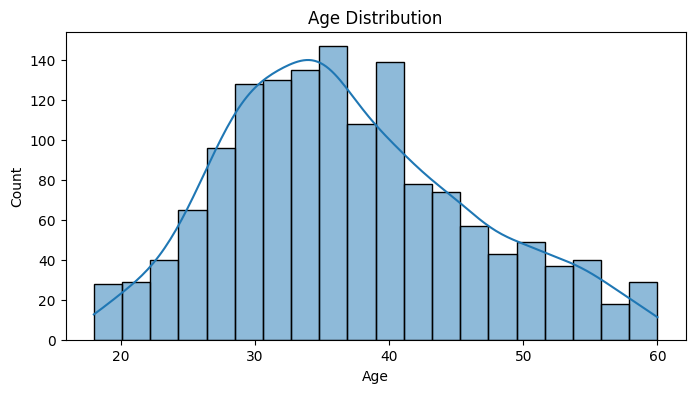

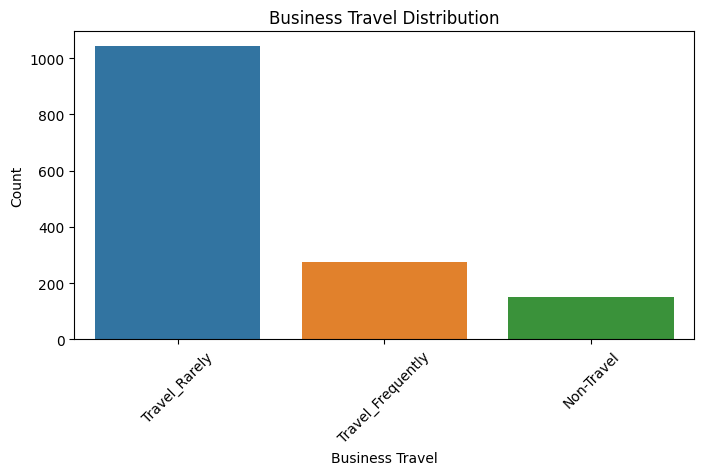

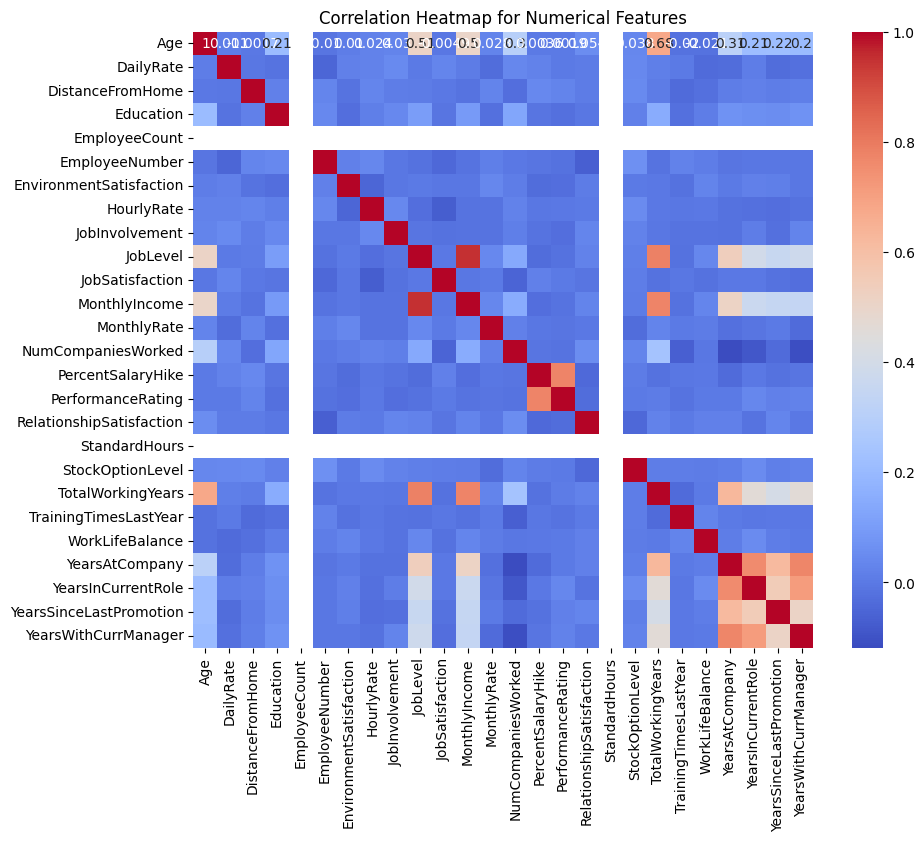

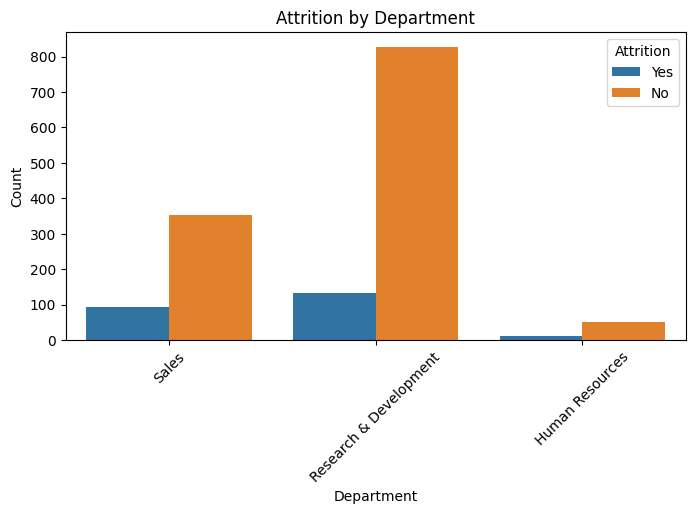

In [4]:
# Visualization 1: Bar Chart for Attrition

plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# Visualization 2: Histogram for Age

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualization 3: Count Plot for Business Travel

plt.figure(figsize=(8, 4))
sns.countplot(x='BusinessTravel', data=df)
plt.title('Business Travel Distribution')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Correlation Heatmap for Numerical Features

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()
# Visualization 5: Attrition by Department

plt.figure(figsize=(8, 4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()


### Outlier Detection

In [5]:
numerical_features = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

z_scores = np.abs(stats.zscore(df[numerical_features]))

#Z-score calc, 
threshold = 5

# Find and print the indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)
outliers = df[outlier_indices]

print("Outliers:")
print(outliers)

Outliers:
     Age Attrition BusinessTravel  DailyRate              Department  \
126   58       Yes  Travel_Rarely        147  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
126                23          4        Medical              1   

     EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
126             165  ...                         4            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
126                 1                 40                      3   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
126               2              40                 10   

     YearsSinceLastPromotion  YearsWithCurrManager  
126                       15                     6  

[1 rows x 35 columns]


##### Hence for the given threshold, we can see that there is only one outlier here, so we shall not worry about it.

### Splitting into Dependent and Independent variables 

In [23]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'] 
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


### Encoding categorical variables

In [41]:
categorical_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime","Over18"]

X_encoded = pd.get_dummies(X, columns=categorical_columns)

#### Feature Scaling is not required here, since only Decision trees and Logistic regression are being done neither of which are scale sensitive

### Splitting into testing and training

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
y_train = y_train.map({'Yes': 1, 'No': 0})

In [40]:
X_train
# y_train.shape
# X_test.shape
# y_test.shape
# y_train

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1097,24,350,21,2,1,1551,3,57,2,1,...,False,False,False,False,False,True,False,False,True,False
727,18,287,5,2,1,1012,2,73,3,1,...,False,False,True,False,False,False,False,True,True,False
254,29,1247,20,2,1,349,4,45,3,2,...,False,False,False,True,False,True,False,False,True,False
1175,39,492,12,3,1,1654,4,66,3,2,...,True,False,False,False,False,False,True,False,True,False
1341,31,311,20,3,1,1881,2,89,3,2,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,3,1,1596,2,46,4,2,...,False,False,False,False,False,False,True,False,True,False
1294,41,447,5,3,1,1814,2,85,4,2,...,False,False,False,False,False,False,False,True,True,False
860,22,1256,3,4,1,1203,3,48,2,1,...,False,False,True,False,False,False,True,False,False,True
1459,29,1378,13,2,1,2053,4,46,2,2,...,False,False,False,False,False,False,True,False,False,True


In [47]:
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)



# Predict on the test data
y_pred = logistic_regression_model.predict(X_test)
y_pred = np.where(y_pred == 0, 'No', 'Yes')

# Convert y_test to string labels if it's not already
y_test = y_test.astype(str)

# Now both y_test and y_pred have string labels

# Evaluate the model's performance using y_test
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8673469387755102
Confusion Matrix:
 [[255   0]
 [ 39   0]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



In [50]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_true = y_test.map({'No': 0, 'Yes': 1})
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)



# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7653061224489796
Confusion Matrix:
 [[217  38]
 [ 31   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       255
           1       0.17      0.21      0.19        39

    accuracy                           0.77       294
   macro avg       0.52      0.53      0.53       294
weighted avg       0.78      0.77      0.77       294

